# ISYE 6414 - HW6 #
## Manvitha Kalicheti ##
### gtID: 903838438 ###

In [1]:
library(car)

Loading required package: carData


In [2]:
data = read.csv('HW5ShipmentData.csv')

<b> Q1 <b/>

In [3]:
model = lm(Cost ~ Weight + Distance + I(Weight^2) + I(Weight*Distance), data = data)

In [4]:
summary(model)


Call:
lm(formula = Cost ~ Weight + Distance + I(Weight^2) + I(Weight * 
    Distance), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7487 -0.2558  0.0532  0.2266  0.9142 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.4746969  0.4584500   1.035 0.316870    
Weight               -0.5781705  0.1706879  -3.387 0.004062 ** 
Distance              0.0090777  0.0026535   3.421 0.003791 ** 
I(Weight^2)           0.0867388  0.0193380   4.485 0.000436 ***
I(Weight * Distance)  0.0072587  0.0006176  11.753 5.74e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4346 on 15 degrees of freedom
Multiple R-squared:  0.9937,	Adjusted R-squared:  0.9921 
F-statistic: 594.6 on 4 and 15 DF,  p-value: 2.541e-16


Here, $y = \beta_0 +\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \epsilon$ 
where $x_1 = $ package weight (in pounds) and $x_2 = $ distance shipped (in miles). 

With $\alpha = 0.05$, $\beta_1$, $\beta_2$, $\beta_3$ and $\beta_4$ are significant as all their $p-values$ are $<\alpha$. $\beta_0$ is not significant with $p-value = 0.31 > \alpha$.

<b> Q2 <b/>

With $x_1 = 5$, $y$ changes by $\beta_2 + \beta_4 x_1$ when $x_2$ increases by one mile.

$\delta y = \beta_2 + \beta_4 x_1 = \beta_2 + 5 \beta_4 = 0.0090777 + 5(0.0072587) = 0.0453712$

The cost of shipment increases by $\$0.0453712$ when
the weight is held constant at 5 pounds and distance inceases by a mile.

<b> Q3 <b/>

In [5]:
res = resid(model)
mean(res)

[1] 7.97634e-18

Expectation (or in this case, mean) of the residuals is nearly zero.

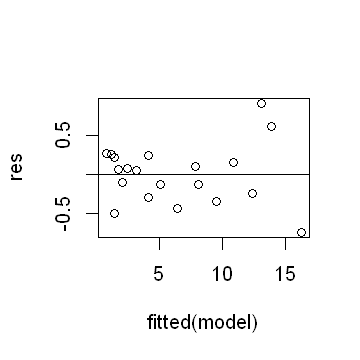

In [6]:
options(repr.plot.width = 3, repr.plot.height = 3)
plot(fitted(model), res)
abline(0,0)

The variance of the residuals seems to increase at higher fitted values $\implies$ they are not of constant variance.

The identical distribution assumption is violated.

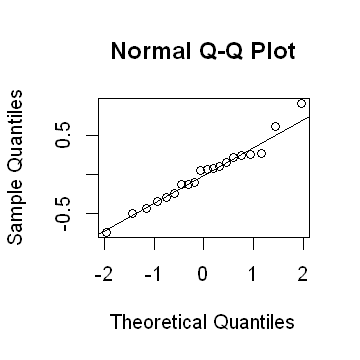

In [7]:
options(repr.plot.width = 3, repr.plot.height = 3)
qqnorm(res)
qqline(res)

The normality assumption seems fine from the QQ plot.

<b> Q4 <b/>

In both models, the $E(\epsilon_i) = 0$ holds.

The normality assumption also holds for both, but seems to hold better here. 

The identical distribution assumption is less violated here than in the reduced model as there is no clear pattern in the complete model unlike the bowl shape we noticed in the reduced model.

<b> Q5 <b/>

$H_0:$ The error terms are not autocorrelated.

$H_a$: The error terms are positively or negatively correlated.

$n = 24$

$k = 3$

$\alpha/2 = 0.05$

Durbin–Watson test statistic: $d = 0.829$

From the tables, 

$d_{L,0.05} = 1.101$ and $d_{U,0.05} = 1.656$. 

Here, $d<d_{L,\alpha/2}$. Hence we reject $H_0$. 
$\implies$ The error terms are positively or negatively correlated.





In [8]:
data1 = read.csv('homework04Hospital.csv')

In [9]:
model1 = lm(Hours~.,data = data1)

<b> Q6 <b/>

In [10]:
rstandard(model1)

1          2          3          4          5          6          7 
-0.3460418  0.4184417  0.1676558  1.2075842  0.4402261 -0.8077234  0.6924578 
         8          9         10         11         12         13         14 
 1.1057046 -1.0710300 -1.3134905  1.3966312 -1.9293551 -0.7007880 -0.1434535 
        15         16 
 1.2248752  0.6133041

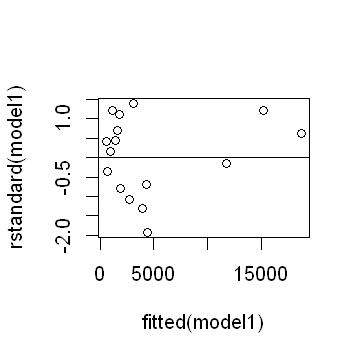

In [11]:
options(repr.plot.width = 3, repr.plot.height = 3)
plot(fitted(model1), rstandard(model1))
abline(0,0)

Two of the observations seem unusual with very high fitted values.

In [12]:
cooks.distance(model1)

1           2           3           4           5           6 
0.004111350 0.013450584 0.001047070 0.068803012 0.004609869 0.021069992 
          7           8           9          10          11          12 
0.011288649 0.027859603 0.027541648 0.067330758 0.044335089 0.201515928 
         13          14          15          16 
0.008722368 0.012871368 1.383805243 1.316994321

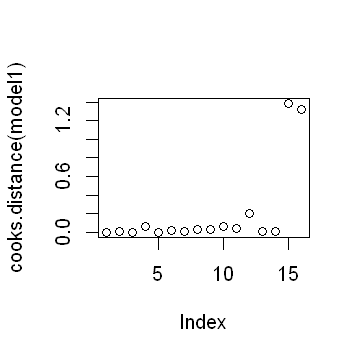

In [13]:
options(repr.plot.width = 3, repr.plot.height = 3)
plot(cooks.distance(model1))

$D_{15}$ and $D_{16}$ are $>4/n = 0.25$ and $>1$. Thus, the 15th and 16th data points are unusual observations/outliers.

<b> Q7 <b/>

In [14]:
summary(model1)


Call:
lm(formula = Hours ~ ., data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-677.23 -270.19   60.93  228.32  517.70 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1946.80204  504.18193   3.861  0.00226 ** 
Xray           0.03858    0.01304   2.958  0.01197 *  
BedDays        1.03939    0.06756  15.386 2.91e-09 ***
Length      -413.75780   98.59828  -4.196  0.00124 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 387.2 on 12 degrees of freedom
Multiple R-squared:  0.9961,	Adjusted R-squared:  0.9952 
F-statistic:  1028 on 3 and 12 DF,  p-value: 9.919e-15


The predictor $\beta_{Length}$being negative is counterintuitive. The average length of stay and
required labor hours cannot be inversely related.

This could be due to multicollinearity.

<b> Q8 <b/>

In [15]:
vif(model1)

Xray   BedDays    Length 
 7.828319 11.396195  2.519559

$R^2_{model} = 0.9961$

$\frac{1}{1-R^2_{model}} = 256.4103$

$VIF_{BedDays} \geq 10$ but $<\frac{1}{1-R^2_{model}}$

$VIF_{Xray}$ and $VIF_{Length}$ are both $<10$ and $<\frac{1}{1-R^2_{model}}$.

Thus, high multicollinearity is not detected.